In [1]:
import ROOT

Welcome to JupyROOT 6.30/02


In [2]:
ERA = "2017"
REGION = "EB1"

In [3]:
class Electron:
    def __init__(self):
        self.pt = -999.
        self.scEta = -999.
        self.mvaNoIso = -999.
        self.miniRelIso = -999.
        self.sip3d = -999
        self.deltaR = -999.
        self.passMVANoIsoWP90 = False
        self.passMVANoIsoWPLoose = False
        self.nearestJetFlavour = -999
        self.genWeight = -999.
    
    def setPt(self, pt):
        self.pt = pt
    
    def setPtCorr(self):
        self.ptCorr = self.pt*(1.0 + max(0., self.miniRelIso-0.1))
        
    def setScEta(self, scEta):
        self.scEta = scEta
        
    def setMVANoIso(self, mvaNoIso):
        self.mvaNoIso = mvaNoIso
    
    def setMiniRelIso(self, miniRelIso):
        self.miniRelIso = miniRelIso
    
    def setSIP3D(self, sip3d):
        self.sip3d = sip3d
        
    def setDeltaR(self, deltaR):
        self.deltaR = deltaR
        
    def setID(self, passMVANoIsoWP90, passMVANoIsoWPLoose):
        self.passMVANoIsoWP90 = passMVANoIsoWP90
        self.passMVANoIsoWPLoose = passMVANoIsoWPLoose
        
    def setNearestJetFlavour(self, nearestJetFlavour):
        self.nearestJetFlavour = nearestJetFlavour

In [4]:
def is_valid_region(eta, region):
    if region == "EB1":
        return abs(eta) < 0.8
    elif region == "EB2":
        return abs(eta) > 0.8 and abs(eta) < 1.479
    elif region == "EE":
        return abs(eta) > 1.479 and abs(eta) < 2.5
    else:
        raise ValueError(f"Region {region} is not valid")    

In [8]:
# Check distributions of variables first
# MVANoIso
h_ljet_mvaNoIso = ROOT.TH1F("h_ljet_mvaNoIso", "h_ljet_mvaNoIso", 200, -1, 1); h_ljet_mvaNoIso.SetDirectory(0)
h_cjet_mvaNoIso = ROOT.TH1F("h_cjet_mvaNoIso", "h_cjet_mvaNoIso", 200, -1, 1); h_cjet_mvaNoIso.SetDirectory(0)
h_bjet_mvaNoIso = ROOT.TH1F("h_bjet_mvaNoIso", "h_bjet_mvaNoIso", 200, -1, 1); h_bjet_mvaNoIso.SetDirectory(0)

In [9]:
f = ROOT.TFile.Open(f"Skimmed/{ERA}/ElectronOptimization_TTLL_powheg.root")
for evt in f.Events:
    electrons = []
    genWeight = evt.genWeight
    for i in range(evt.nElectrons):
        el = Electron()
        el.setPtCorr(evt.ptCorr[i])
        el.setScEta(evt.scEta[i])
        el.setMVANoIso(evt.MVANoIso[i])
        el.setMiniRelIso(evt.MiniRelIso[i])
        el.setSIP3D(evt.SIP3D[i])
        el.setDeltaR(evt.DeltaR[i])
        el.setID(evt.PassMVANoIsoWP90[i], evt.PassMVANoIsoWPLoose[i])
        el.setNearestJetFlavour(evt.NearestJetFlavour[i])
        electrons.append(el)
    
    for el in electrons:
        if el.deltaR > 0.4: continue
        if el.miniRelIso > 0.4: continue
        if el.sip3d > 4: continue
        if not is_valid_region(el.scEta, REGION): continue
        
        if el.nearestJetFlavour == 1:
            h_ljet_mvaNoIso.Fill(el.mvaNoIso, genWeight)
        elif el.nearestJetFlavour == 4:
            h_cjet_mvaNoIso.Fill(el.mvaNoIso, genWeight)
        elif el.nearestJetFlavour == 5:
            h_bjet_mvaNoIso.Fill(el.mvaNoIso, genWeight)
        else:
            continue
f.Close()

In [10]:
h_ljet_mvaNoIso.SetStats(0)
h_cjet_mvaNoIso.SetStats(0)
h_bjet_mvaNoIso.SetStats(0)

h_ljet_mvaNoIso.Scale(1./h_ljet_mvaNoIso.Integral())
h_cjet_mvaNoIso.Scale(1./h_cjet_mvaNoIso.Integral())
h_bjet_mvaNoIso.Scale(1./h_bjet_mvaNoIso.Integral())

h_ljet_mvaNoIso.SetLineColor(ROOT.kBlack); h_ljet_mvaNoIso.SetLineWidth(2)
h_cjet_mvaNoIso.SetLineColor(ROOT.kGreen); h_ljet_mvaNoIso.SetLineWidth(2)
h_bjet_mvaNoIso.SetLineColor(ROOT.kBlue); h_bjet_mvaNoIso.SetLineWidth(2)

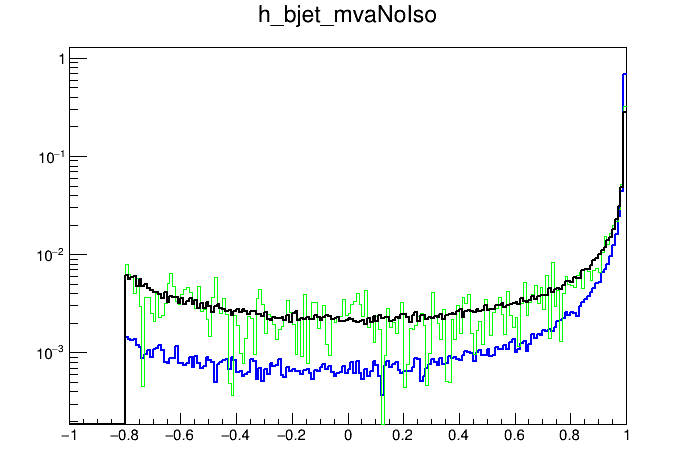

In [11]:
c = ROOT.TCanvas()
c.SetLogy()
c.cd()
h_bjet_mvaNoIso.Draw("hist")
h_cjet_mvaNoIso.Draw("hist&same")
h_ljet_mvaNoIso.Draw("hist&same")
c.Draw()

In [14]:
h_ljet_miniRelIso = ROOT.TH1F("h_ljet_miniRelIso", "h_ljet", 100, 0, 1); h_ljet_miniRelIso.SetDirectory(0)
h_cjet_miniRelIso = ROOT.TH1F("h_cjet_miniRelIso", "h_cjet", 100, 0, 1); h_cjet_miniRelIso.SetDirectory(0)
h_bjet_miniRelIso = ROOT.TH1F("h_bjet_miniRelIso", "h_bjet", 100, 0, 1); h_bjet_miniRelIso.SetDirectory(0)

In [15]:
f = ROOT.TFile.Open(f"Skimmed/{ERA}/ElectronOptimization_TTLL_powheg.root")
for evt in f.Events:
    electrons = []
    genWeight = evt.genWeight
    for i in range(evt.nElectrons):
        el = Electron()
        el.setPtCorr(evt.ptCorr[i])
        el.setScEta(evt.scEta[i])
        el.setMVANoIso(evt.MVANoIso[i])
        el.setMiniRelIso(evt.MiniRelIso[i])
        el.setSIP3D(evt.SIP3D[i])
        el.setDeltaR(evt.DeltaR[i])
        el.setID(evt.PassMVANoIsoWP90[i], evt.PassMVANoIsoWPLoose[i])
        el.setNearestJetFlavour(evt.NearestJetFlavour[i])
        electrons.append(el)
    
    for el in electrons:
        if el.deltaR > 0.4: continue
        if el.sip3d > 4: continue
        if el.mvaNoIso < -0.2: continue
        if not is_valid_region(el.scEta, REGION): continue
        
        if el.nearestJetFlavour == 1:
            h_ljet_miniRelIso.Fill(el.miniRelIso, genWeight)
        elif el.nearestJetFlavour == 4:
            h_cjet_miniRelIso.Fill(el.miniRelIso, genWeight)
        elif el.nearestJetFlavour == 5:
            h_bjet_miniRelIso.Fill(el.miniRelIso, genWeight)
        else:
            continue
f.Close()

In [16]:
h_ljet_miniRelIso.SetStats(0)
h_cjet_miniRelIso.SetStats(0)
h_bjet_miniRelIso.SetStats(0)

h_ljet_miniRelIso.Scale(1./h_ljet_miniRelIso.Integral())
h_cjet_miniRelIso.Scale(1./h_cjet_miniRelIso.Integral())
h_bjet_miniRelIso.Scale(1./h_bjet_miniRelIso.Integral())

h_ljet_miniRelIso.SetLineColor(ROOT.kBlack); h_ljet_miniRelIso.SetLineWidth(2)
h_cjet_miniRelIso.SetLineColor(ROOT.kGreen); h_ljet_miniRelIso.SetLineWidth(2)
h_bjet_miniRelIso.SetLineColor(ROOT.kBlue); h_bjet_miniRelIso.SetLineWidth(2)

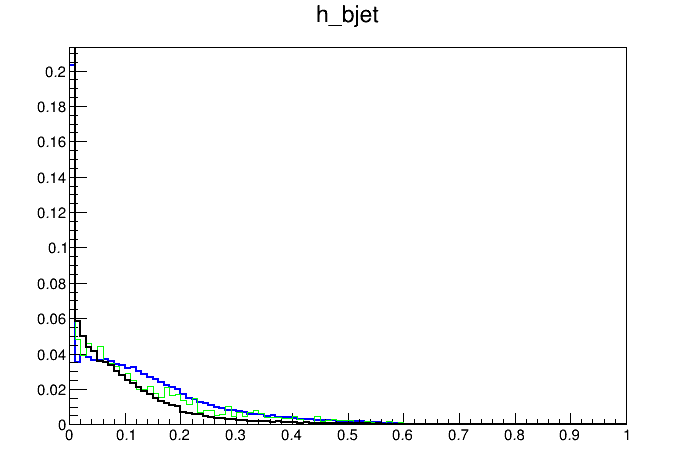

In [17]:
c = ROOT.TCanvas()
#c.SetLogy()
c.cd()
h_bjet_miniRelIso.Draw("hist")
h_cjet_miniRelIso.Draw("hist&same")
h_ljet_miniRelIso.Draw("hist&same")
c.Draw()

In [18]:
h_ljet_sip3d = ROOT.TH1F("h_ljet_sip3d", "h_ljet", 80, 0, 8); h_ljet_sip3d.SetDirectory(0)
h_cjet_sip3d = ROOT.TH1F("h_cjet_sip3d", "h_cjet", 80, 0, 8); h_cjet_sip3d.SetDirectory(0)
h_bjet_sip3d = ROOT.TH1F("h_bjet_sip3d", "h_bjet", 80, 0, 8); h_bjet_sip3d.SetDirectory(0)

In [19]:
f = ROOT.TFile.Open(f"Skimmed/{ERA}/ElectronOptimization_TTLL_powheg.root")
for evt in f.Events:
    electrons = []
    genWeight = evt.genWeight
    for i in range(evt.nElectrons):
        el = Electron()
        el.setPtCorr(evt.ptCorr[i])
        el.setScEta(evt.scEta[i])
        el.setMVANoIso(evt.MVANoIso[i])
        el.setMiniRelIso(evt.MiniRelIso[i])
        el.setSIP3D(evt.SIP3D[i])
        el.setDeltaR(evt.DeltaR[i])
        el.setID(evt.PassMVANoIsoWP90[i], evt.PassMVANoIsoWPLoose[i])
        el.setNearestJetFlavour(evt.NearestJetFlavour[i])
        electrons.append(el)
    
    for el in electrons:
        if el.deltaR > 0.4: continue
        if el.miniRelIso > 0.4: continue
        if el.mvaNoIso < 0.9: continue
        if not is_valid_region(el.scEta, REGION): continue
        
        if el.nearestJetFlavour == 1:
            h_ljet_sip3d.Fill(el.sip3d, genWeight)
        elif el.nearestJetFlavour == 4:
            h_cjet_sip3d.Fill(el.sip3d, genWeight)
        elif el.nearestJetFlavour == 5:
            h_bjet_sip3d.Fill(el.sip3d, genWeight)
        else:
            continue
f.Close()

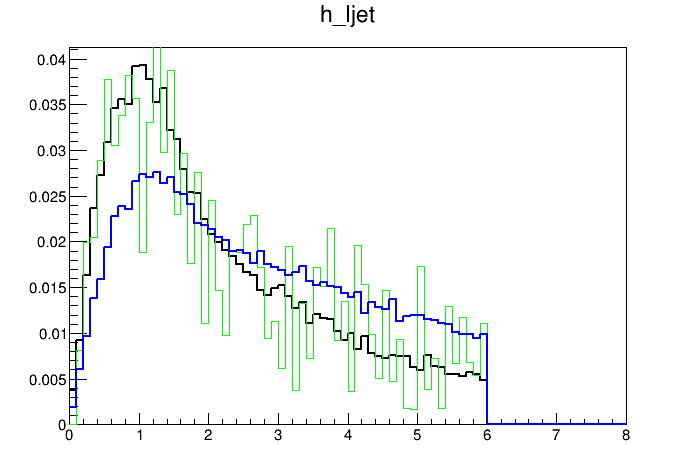

In [20]:
h_ljet_sip3d.SetStats(0)
h_cjet_sip3d.SetStats(0)
h_bjet_sip3d.SetStats(0)

h_ljet_sip3d.Scale(1./h_ljet_sip3d.Integral())
h_cjet_sip3d.Scale(1./h_cjet_sip3d.Integral())
h_bjet_sip3d.Scale(1./h_bjet_sip3d.Integral())

h_ljet_sip3d.SetLineColor(ROOT.kBlack); h_ljet_sip3d.SetLineWidth(2)
h_cjet_sip3d.SetLineColor(ROOT.kGreen); h_ljet_sip3d.SetLineWidth(2)
h_bjet_sip3d.SetLineColor(ROOT.kBlue); h_bjet_sip3d.SetLineWidth(2)

c = ROOT.TCanvas()
#c.SetLogy()
c.cd()
h_ljet_sip3d.Draw("hist")
h_cjet_sip3d.Draw("hist&same")
h_bjet_sip3d.Draw("hist&same")
c.Draw()

In [5]:
MiniRelIsoLooseCut = 0.4
MVANoIsoLooseCut = -0.2
SIP3DCut = 4

In [47]:
h_ljet_loose = ROOT.TH1F("ljet_loose", "", 28, 10, 150); h_ljet_loose.SetDirectory(0)
h_cjet_loose = ROOT.TH1F("cjet_loose", "", 28, 10, 150); h_cjet_loose.SetDirectory(0)
h_bjet_loose = ROOT.TH1F("bjet_loose", "", 28, 10, 150); h_bjet_loose.SetDirectory(0)

h_ljet_tight = ROOT.TH1F("ljet_tight", "", 28, 10, 150); h_ljet_tight.SetDirectory(0)
h_cjet_tight = ROOT.TH1F("cjet_tight", "", 28, 10, 150); h_cjet_tight.SetDirectory(0)
h_bjet_tight = ROOT.TH1F("bjet_tight", "", 28, 10, 150); h_bjet_tight.SetDirectory(0)

In [49]:
f = ROOT.TFile.Open(f"Skimmed/{ERA}/ElectronOptimization_TTLL_powheg.root")
for evt in f.Events:
    electrons = []
    genWeight = evt.genWeight
    for i in range(evt.nElectrons):
        el = Electron()
        el.setPt(evt.Pt[i])
        el.setScEta(evt.scEta[i])
        el.setMVANoIso(evt.MVANoIso[i])
        el.setMiniRelIso(evt.MiniRelIso[i])
        el.setSIP3D(evt.SIP3D[i])
        el.setDeltaR(evt.DeltaR[i])
        el.setID(evt.PassMVANoIsoWP90[i], evt.PassMVANoIsoWPLoose[i])
        el.setNearestJetFlavour(evt.NearestJetFlavour[i])
        el.setPtCorr()
        electrons.append(el)
    
    for el in electrons:
        if el.deltaR < 0.15 or el.deltaR > 0.4: continue
        if not is_valid_region(el.scEta, REGION): continue
        # Loose ID cut
        if not (el.passMVANoIsoWPLoose or el.miniRelIso < 0.5): continue
        if not el.sip3d < 4: continue
        
        if el.nearestJetFlavour == 1:
            h_ljet_loose.Fill(el.ptCorr, genWeight)
            if el.miniRelIso < 0.1 and el.passMVANoIsoWP90:
                h_ljet_tight.Fill(el.ptCorr, genWeight)
        elif el.nearestJetFlavour == 4:
            h_cjet_loose.Fill(el.ptCorr, genWeight)
            if el.miniRelIso < 0.1 and el.passMVANoIsoWP90:
                h_cjet_tight.Fill(el.ptCorr, genWeight)
        elif el.nearestJetFlavour == 5:
            h_bjet_loose.Fill(el.ptCorr, genWeight)
            if el.miniRelIso < 0.1 and el.passMVANoIsoWP90:
                h_bjet_tight.Fill(el.ptCorr, genWeight)
        else:
            continue
f.Close()

In [53]:
# calculate fake rate
fake_ljet = h_ljet_tight.Clone("fake_ljet")
fake_ljet.Divide(h_ljet_loose)

fake_cjet = h_cjet_tight.Clone("fake_cjet")
fake_cjet.Divide(h_cjet_loose)

fake_bjet = h_bjet_tight.Clone("fake_bjet")
fake_bjet.Divide(h_bjet_loose)

True

In [54]:
fake_ljet.SetStats(0)
fake_ljet.SetLineColor(ROOT.kBlack)
fake_ljet.SetLineWidth(2)
fake_ljet.GetXaxis().SetRangeUser(10., 100.)
fake_ljet.GetYaxis().SetRangeUser(0.01, 1.)

fake_cjet.SetStats(0)
fake_cjet.SetLineColor(ROOT.kGreen)
fake_cjet.SetLineWidth(2)

fake_bjet.SetStats(0)
fake_bjet.SetLineColor(ROOT.kBlue)
fake_bjet.SetLineWidth(2)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: cvs


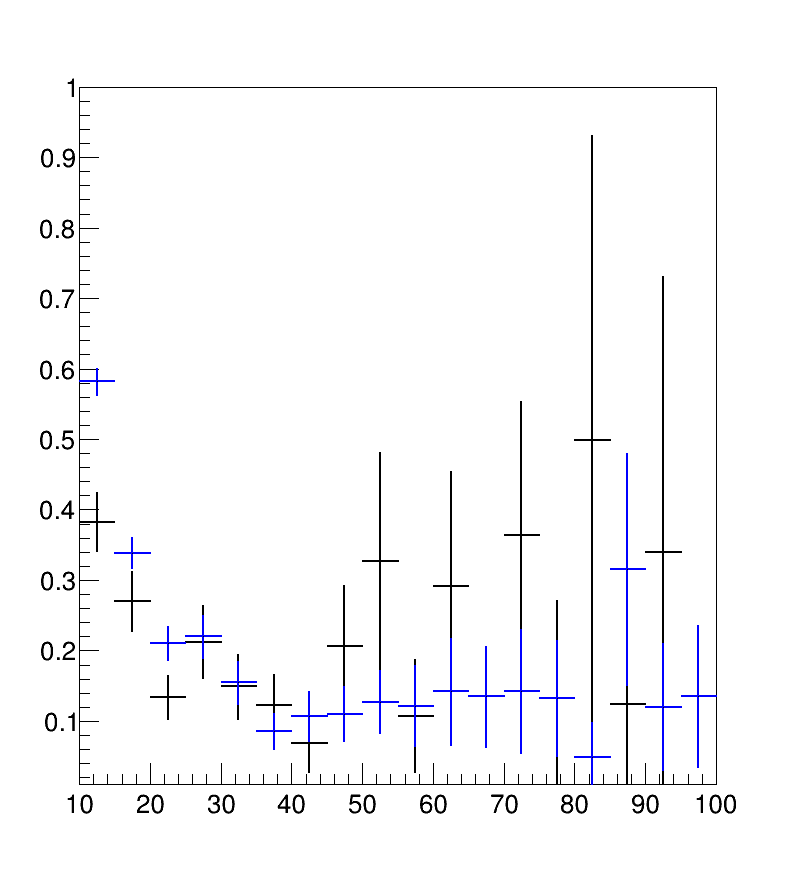

In [55]:
c = ROOT.TCanvas("cvs", "", 800, 900)
#c.SetLogy()
c.cd()
fake_ljet.Draw()
#fake_cjet.Draw("same")
fake_bjet.Draw("same")
c.Draw()